
# Relationship between life expenctacy, Fertility Rate and Economical growth for all countries - grouped by income level

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Is there a relationship between how long people live, their number of children and the economic growth of their country? Based on datasets from Gapminder https://www.gapminder.org/data/ on all countries, the goal is to uncover if correlations exisit between those how long people live, how much babies they make and economic growth. 
I am working with 4 datasets: <br> 
1. income_per_person_gdppercapita_ppp_inflation_adjusted.csv <br> the GDP or Gross Domestic Product. It has often been used to classify countries by Income. this dataset is in american dollars <br>
2. life_expectancy_years.csv <br> This dataset show how much people live in average in each country
3. children_per_woman_total_fertility.csv 
*"This entry focuses on the number of births per woman in a population. The most commonly used metric is the Total Fertility Rate (TFR) – or often simply 'fertility rate' – which measures the average number of children per woman"* 
<br> 
https://ourworldindata.org/fertility-rate <br>
4. gdp_total_yearly_growth.csv <br> this dataset shows economical growth for each countries in percentage of the GDP(Gross Domestic product). 

<p> The data will be analyzed since the year 1950. the year 1950 is selected because it is after just after the 2nd world war II which has affected most countries in the west. It is also since that time that many countries all over the world could benefit from economical growth for example many asians countries. Almost all African countries gain their independance from the 1960's. 
    And equally relevant to this analysis, with women going to work and other major change in lifestyles,the need to question traditionally big family arised in the following decades.<br>
<p> what is the relationship between fertility, longevity and economical growth for countries? is there even a relationship? 
Through the analysis that I am going to make, we will get to discover what data says about different countries from all income levels. <br> 
    
   #### steps to follow: 
   
   * we are first going to Group countries by GDP or Income Level
   * The datasets provided have Data from the year 1800 which is more 200 years of data. Since we are only trying to understand changes since the 1950's , we are going to reduce our data from the year 1950 to  2018. 
  
   * we will then group countries in each datasets -Fertility Rate, Life Expectancy and economic Growth based on their income level
   * Compare the average life expectancy of countries based on their income level
   * Compare How much children are born in country based on their income level
   * Finally is there a relationship between growth, how much babies are born and economical growth in a country? 
   
   Let's begin by importing all the packages that will be needed

In [1]:
# importing packages needed for the analysis
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

In this section I am going to load the datasets that will be used. <br>
1.children_per_woman_total_fertility.csv <br>
2.gdp_total_yearly_growth.csv <br>
3.income_per_person_gdppercapita_ppp_inflation_adjusted.csv <br>
4.life_expectancy_years.csv <br>

These datasets are already neat and clean. In this section I will get a look at the data to prepare it for the actual analysis. 
The data will be loaded, checked for null values, uneccessary columns will be droped. etc..


### General Properties

#### Income per person GDP
<br>
This dataset will be used to group countries by income or GDP Per Capita. 
In order to do that, I could simply use the Quartiles in the data which simply to use group countries by the GDP income in 4 groups based on the most recent year. or to use the New Country Classification by income level  from the World bank. https://blogs.worldbank.org/opendata/new-country-classifications-income-level-2018-2019. but we will get in to that later. for now let's have a quick look at the dataset

In [2]:
#importing the income_per_person_gdppercapita_ppp_inflation_adjusted.csv file
#running df.head() for a quick view at the data
df_gdp = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
df_gdp.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,1530,1610,1660,1840,1810,1780,1750,1740,1800,1870
1,Albania,667,667,667,667,667,668,668,668,668,...,9530,9930,10200,10400,10500,10700,11000,11400,11900,12400
2,Algeria,715,716,717,718,719,720,721,722,723,...,12600,12900,13000,13200,13300,13500,13700,14000,13800,13700
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,41700,39000,42000,41900,43700,44900,46600,48200,49800,51500
4,Angola,618,620,623,626,628,631,634,637,640,...,5910,5900,5910,6000,6190,6260,6230,6030,5940,5850


In [3]:
#checking the composition of the dataframe
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Columns: 220 entries, country to 2018
dtypes: int64(219), object(1)
memory usage: 331.8+ KB


In [4]:
#checking the number of columns and rows
df_gdp.shape

(193, 220)

This list is very important because we will group all the othes datasets based on income level.
checking for unique values guarantees that each country is only repeated once, which is what we need to ensure that our analysis is right.

In [5]:
#checking unique values in the GDP dataset
unique = df_gdp.country.unique()
len(unique)

193

the shape of our data showed that the data has 193. we can see from the command above that all countries are only included one in the dataset. great! let's continue by checking for null values. 

In [6]:
df_gdp.isnull().values.any()

False

we can that the dataset has data on 193 countries. From the year 1800 to 2018. With no missing value. <br>
before dropping columns,let's first load the other datasets in order to understand better the data and the periods covered by all the datasets. since we will be comparing countries, it's good to know that the same countries and periods are covered. 

#### GDP Yearly Growth

This data set describre the increase in GDP by year. 

In [7]:
#importing the income_per_person_gdppercapita_ppp_inflation_adjusted.csv file
#running df.head() for a quick view at the data
df_growth = pd.read_csv('gdp_total_yearly_growth.csv')
df_growth.head()

,country,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,6.55,12.40,4.56,13.600,2.50,20.20,8.04,6.98,14.80,4.47
1,Albania,0.418,0.418,0.418,0.418,0.418,0.418,0.418,0.418,0.418,...,5.97,5.53,5.77,5.850,7.24,3.28,3.36,2.86,2.64,2.06
2,Algeria,0.356,0.356,0.356,0.356,0.356,0.356,0.356,0.356,0.356,...,5.41,5.38,1.72,3.420,2.02,1.70,3.57,2.31,2.58,2.99
3,Andorra,0.166,0.166,0.166,0.166,0.166,0.166,0.166,0.166,0.166,...,8.64,7.80,4.97,0.161,-4.22,-5.06,-3.43,-2.83,NaN,NaN
4,Angola,0.425,0.425,0.425,0.425,0.425,0.425,0.425,0.425,0.425,...,11.20,20.50,18.60,23.200,13.80,2.39,3.45,3.87,4.96,3.79


In [8]:
df_growth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Columns: 214 entries, country to 2013
dtypes: float64(213), object(1)
memory usage: 324.4+ KB


In [9]:
df_growth.shape

(194, 214)

In [10]:
#checking if there is any missing values
df_growth.isnull().values.any()

True

In [11]:
#checking how many null values are in the dataframe. depending on the volumes of missing values, we will decide of the next step
df_growth.isnull().sum().sum()

42

In [12]:
nan_rows = df_growth.isnull().any().any()
nan_rows

True

The growth by GDP Dataset had 194 entries or countries. with 214 columns. As we can see from the df_growth.info() command, the period covered goes from 1801 to 2013. 
he previous dataset on gdp/income had had a shape of (193,220). This dataset has a shape of (194,214). 
Since our exploration will be a comparaison, after we load all the dataset, we need to make sure that the countries and periods covered are the same. or at least understand and notice the irregularities and includes them in our conclusions. 

### Life Expectancy 

This data set describre the average life expectancy in years.
we are going to import the file (life_expectancy_years.csv)

In [13]:
# importing the dataset
#checking the head
df_expectancy = pd.read_csv('life_expectancy_years.csv')
df_expectancy.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,55.7,56.2,56.7,57.2,57.7,57.8,57.9,58.0,58.4,58.7
1,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,75.9,76.3,76.7,77.0,77.2,77.4,77.6,77.7,77.9,78.0
2,Algeria,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,76.3,76.5,76.7,76.8,77.0,77.1,77.3,77.4,77.6,77.9
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.7,82.7,82.6,82.6,82.6,82.6,82.5,82.5,NaN,NaN
4,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,59.3,60.1,60.9,61.7,62.5,63.3,64.0,64.7,64.9,65.2


In [14]:
#checking the shape of the dataframe
df_expectancy.shape

(187, 220)

In [15]:
#the dataframe has 220 columns, and 187 rows. datatypes are float which is quite normale and expected for age.
df_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Columns: 220 entries, country to 2018
dtypes: float64(219), object(1)
memory usage: 321.5+ KB


In [16]:
#Checking if there is any null values
df_expectancy.isnull().values.any()

True

In [17]:
df_expectancy.isnull().sum().head()

country    0
1800       3
1801       3
1802       3
1803       3
dtype: int64

In [18]:
#counting null values
df_expectancy.isnull().sum().sum()

516

516 seems to be too big of a number to just drop everything. this dataframe covers period from 1800 to 2018. In order to respond to our analysis questions we will only need the period from 1950. we will come back to this later. now let's load the fertility dataset.
The null values will be handled once the data is grouped. 

### Fertility Rate or Number of children per woman

This data set describre the average number of children per woman in all countries. 
we are going to import the file (children_per_woman_total_fertility.csv)

In [19]:
#import the children_per_woman_total_fertility.csv dataset
df_birth = pd.read_csv('children_per_woman_total_fertility.csv')
df_birth.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.04,5.82,5.60,5.38,5.17,4.98,4.80,4.64,4.48,4.33
1,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.65,1.65,1.67,1.69,1.70,1.71,1.71,1.71,1.71,1.71
2,Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.83,2.89,2.93,2.94,2.92,2.89,2.84,2.78,2.71,2.64
3,Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,...,6.24,6.16,6.08,6.00,5.92,5.84,5.77,5.69,5.62,5.55
4,Antigua and Barbuda,5.00,5.00,4.99,4.99,4.99,4.98,4.98,4.97,4.97,...,2.15,2.13,2.12,2.10,2.09,2.08,2.06,2.05,2.04,2.03


In [20]:
#checking the dataframe
df_birth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Columns: 220 entries, country to 2018
dtypes: float64(219), object(1)
memory usage: 316.3+ KB


In [21]:
#checking the shape of the dataframe
df_birth.shape

(184, 220)

In [22]:
# checking null values
df_birth.isnull().values.any()

False

There are no missing values in the Fertility Rate Dataset. the dataset covers from the year 1800 to the year 2018.
The shape of the dataframe is 184 rows and 220 columns. 

# Grouping by GDP Levels

In this section we are going to check if the same countries are present in all 4 datasets, check the period covered, group by income levels. after this step we will proceed with the Exploratoy Data Analysis. 
<ul>
<li>group the countries by income level (4 levels) </li>
<li>create a new daframe for each of those levels that will be used for Exploratory Data Analysis later</li>
<li>check the countries in the dataframe</li>
<li>Adjust the periods covered by all 4 datasets </li>
</ul>

#### Comparings Datasets shapes

By comparing the 4 datasets shapes we can see that the number of columns is not the same in all 4 datasets. The columns represents the years. the rows the countries included.As you can see in the table below.<br> 
But for now let's focus on grouping the countries by Income Level based on the GDP Dataset.

Dataset shape     | Gdp_Income_Level    | Life Expectancy     | Fertility Rate     | Gdp Growth |
  ---             |----------           |------               |------              |----------  |
columns|   193               |     187             |    184             | 194        |
 rows    |  220                |     220             |     220            |    214     |
 
 let's make sure that the countries compared are the same, we are going to compare the columns from all the 4 datasets. 
 we will look into that later. let's proceed with the grouping by income first. since the grouping of the other dataset will also be done based on gdp.

### Grouping by Income Level

the file income_per_person_gdppercapita_ppp_inflation_adjusted.csv from Gapminder gives data from 1800 to 2018. 
since we are trying to group and observe what happened in the last decades, we are going to use the latest year to group countries. we are going to group countries based on their 2018 GDP.

In [23]:
#2018 is the latest year
df_gdp.head(1)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,1530,1610,1660,1840,1810,1780,1750,1740,1800,1870


In [24]:
#Trying to understand the distribution of the gdp per capita based on the Quartiles. 
df_gdp['2018'].describe()

count       193.000000
mean      18241.502591
std       19664.365483
min         629.000000
25%        3670.000000
50%       12100.000000
75%       25500.000000
max      121000.000000
Name: 2018, dtype: float64

if we consider the number below, the 25% of low income countries have 3670 Dollars and below <br>
the second group in the 50 would have a GDP of 12100  per capita and below, <br>
the third group 25500 Dollars  of GDP per Capita <br>
the last and richest group would have 121000 Dollars of GDP per capita. <br>

Below we added an image from the world bank Group whith the most recent classification of countries based on income level.
the classification is from 2018, this year.
So I think its might be a more realistic categorisation of countries by income level. <br> 
After some time looking for officials classifications of countries by Income Level, its seemed like the world bank would  be a more credible authority. 
The Value below are the GNI or Gross National Income. they are not exactly the GDP but might be a more realistic way to compare countries than Quartiles. 


<img src="new country classification by GDP.PNG">
https://blogs.worldbank.org/opendata/new-country-classifications-income-level-2018-2019#comments


We will use the classification above to continue our analysis

#### Low Income Countries
countries with less than 995 USD in GDP per capita

In [25]:
# grouping countries by income using loc and only keeping the country column
low_income = df_gdp.loc[df_gdp['2018'] < 995, ['country', '2018']]
low_income


,country,2018
27,Burundi,691
32,Central African Republic,689
38,"Congo, Dem. Rep.",751
94,Liberia,801
123,Niger,949
154,Somalia,629


#### Lower Middle Income Countries
countries with GDP per capita between 996 and 3895 USD

In [26]:
# grouping countries by income using loc and only keeping the country column
lower_middle_income = df_gdp.loc[(df_gdp['2018'] > 995) & (df_gdp['2018'] < 3896), ['country', '2018']]
lower_middle_income.head()

,country,2018
0,Afghanistan,1870
13,Bangladesh,3720
18,Benin,2170
26,Burkina Faso,1710
28,Cambodia,3830


#### Upper Middle Income Countries
countries with GDP between 3896 and 12055 USD

In [27]:
# grouping countries by income using loc and only keeping the country column
upper_middle_income = df_gdp.loc[(df_gdp['2018'] >= 3896) & (df_gdp['2018'] <= 12055), ['country', '2018']]
upper_middle_income.head()

,country,2018
4,Angola,5850
7,Armenia,8660
17,Belize,7710
19,Bhutan,9930
20,Bolivia,6980


#### High Income Countries
Countries with GDP Per capita which is above 12055 USD

In [28]:
# grouping countries by income using loc and only keeping the country column
high_income = df_gdp.loc[df_gdp['2018'] > 12055, ['country', '2018']]
high_income.head()

,country,2018
1,Albania,12400
2,Algeria,13700
3,Andorra,51500
5,Antigua and Barbuda,21000
6,Argentina,18900


Verifying that the count all the countries included in the income file found a group

In [29]:
#veryfing that the count of our 4 new dataframes are equals to the total of gdp_df they were extracted from. 
#The number match our original GDP file
low_income.count()+ lower_middle_income.count() + upper_middle_income.count() + high_income.count()

country    193
2018       193
dtype: int64

the count match our originial GDP file. meaning that each country is grouped. perfect! we are now going to group countries in the life expectancy dataset in the income level group as set above.

### Life Expectancy Grouping by Income Level, from the year 1950
Now we are going to group the other datasets by Income. 
let's start by the life expectancy Dataset <br>
based on the classification by countries's income, we are equally going to classify the other datasets in 4 groups. <br>
we are going to create 4 groups within the life expectancy group: 
* low_income_expectancy
* lower_middle_income_expectancy
* upper_middle_income_expectancy
* high_income_expectancy

#### Limiting the dataset from the year 1950
this dataset has data from the year 1800. lets remove the 150 years that are not necessary to answer our questions and only keep the decades that are of interest to us. But that still leaves us with 68 years of data or meaning 68 rows per country. In order to properly understand the progress, we are going to divide the data in decades from 1950 to 2018. Since we want to globally understand the tendancy, randomly picking a point in time every decade should give an idea of the general tendancy. 

In [30]:
#dropping irrelevant columns.  from the year 1800 to 1949
cols=  df_expectancy.columns[1:151] 
df_expectancy.drop(cols,axis=1, inplace=True)
df_expectancy.head()

,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,32.0,32.4,33.0,33.7,34.4,35.1,35.8,36.5,37.2,...,55.7,56.2,56.7,57.2,57.7,57.8,57.9,58.0,58.4,58.7
1,Albania,54.5,54.7,55.2,55.8,56.5,57.3,58.3,59.3,60.4,...,75.9,76.3,76.7,77.0,77.2,77.4,77.6,77.7,77.9,78.0
2,Algeria,46.9,47.1,47.6,48.1,48.6,49.2,49.7,50.3,50.9,...,76.3,76.5,76.7,76.8,77.0,77.1,77.3,77.4,77.6,77.9
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.7,82.7,82.6,82.6,82.6,82.6,82.5,82.5,NaN,NaN
4,Angola,36.6,36.9,37.5,38.1,38.7,39.3,39.9,40.5,41.2,...,59.3,60.1,60.9,61.7,62.5,63.3,64.0,64.7,64.9,65.2


the dataset above would still be too much unnecessary data. so we are only to randomly select one year every decade from 1950.

In [31]:
#selecting the years 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2018
df_expectancy = df_expectancy[['country','1950', '1960', '1970', '1980', '1990', '2000', '2010', '2018']]
df_expectancy.head()

,country,1950,1960,1970,1980,1990,2000,2010,2018
0,Afghanistan,32.0,38.6,45.8,43.3,51.6,51.6,56.2,58.7
1,Albania,54.5,62.7,67.4,72.3,73.9,74.4,76.3,78.0
2,Algeria,46.9,52.0,57.5,62.1,71.0,73.9,76.5,77.9
3,Andorra,NaN,NaN,76.0,78.7,79.5,81.8,82.7,NaN
4,Angola,36.6,42.4,48.7,49.9,50.2,53.4,60.1,65.2


#### Life Expectancy grouping For Low Income Income Countries
we are going to use the isin to group countries which are in low income country dataframe created earlier

In [32]:
#grouping life for low income countries
low_income_expectancy = df_expectancy.loc[df_expectancy.country.isin(low_income.country.tolist())]
low_income_expectancy.head(1)

,country,1950,1960,1970,1980,1990,2000,2010,2018
27,Burundi,39.0,42.0,44.7,46.3,48.0,47.9,57.7,61.1


#### Life Expectancy grouping For Lower Middle Income Countries
Grouping Lower Middle Income Countries Life Expectancy

In [33]:
#grouping life for lower middle income countries
lower_middle_income_expectancy = df_expectancy.loc[df_expectancy.country.isin(lower_middle_income.country.tolist())]
lower_middle_income_expectancy.head(1)

,country,1950,1960,1970,1980,1990,2000,2010,2018
0,Afghanistan,32.0,38.6,45.8,43.3,51.6,51.6,56.2,58.7


#### Life Expectancy grouping For Upper Middle Income Countries
Grouping Life Expectancy data for Upper Middle Income Countries

In [34]:
#grouping life for upper middle income countries
upper_middle_income_expectancy = df_expectancy.loc[df_expectancy.country.isin(upper_middle_income.country.tolist())]
upper_middle_income_expectancy.head(1)

,country,1950,1960,1970,1980,1990,2000,2010,2018
4,Angola,36.6,42.4,48.7,49.9,50.2,53.4,60.1,65.2


#### Life Expectancy grouping For High Income Countries
Grouping Life Expectancy Data for High Income Countries

In [35]:
#grouping life for High income countries
high_income_expectancy = df_expectancy.loc[df_expectancy.country.isin(high_income.country.tolist())]
high_income_expectancy.head(1)

,country,1950,1960,1970,1980,1990,2000,2010,2018
1,Albania,54.5,62.7,67.4,72.3,73.9,74.4,76.3,78.0


### Fertility Rate Grouping by Income Level, from the year 1950
based on the classification by countries's income, we are equally going to classify this  dataset in 4 groups. <br>
we are going to create 4 groups within the life expectancy group: 
* low_income_birth
* lower_middle_income_birth
* upper_middle_income_birth
* high_income_birth

#### Limiting the dataset from the year 1950
this dataset has data from the year 1800. lets remove the 150 years that are not necessary to answer our questions and only keep the decades that are of interest to us.

In [36]:
cols=  df_birth.columns[1:151] 
df_birth.drop(cols,axis=1, inplace=True)
df_birth.head()

,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,7.57,7.56,7.55,7.54,7.53,7.52,7.51,7.49,7.48,...,6.04,5.82,5.60,5.38,5.17,4.98,4.80,4.64,4.48,4.33
1,Albania,5.87,5.97,6.13,6.27,6.37,6.45,6.50,6.53,6.54,...,1.65,1.65,1.67,1.69,1.70,1.71,1.71,1.71,1.71,1.71
2,Algeria,7.49,7.47,7.44,7.43,7.41,7.41,7.41,7.43,7.45,...,2.83,2.89,2.93,2.94,2.92,2.89,2.84,2.78,2.71,2.64
3,Angola,7.11,7.13,7.15,7.17,7.20,7.23,7.27,7.31,7.36,...,6.24,6.16,6.08,6.00,5.92,5.84,5.77,5.69,5.62,5.55
4,Antigua and Barbuda,4.45,4.46,4.50,4.52,4.53,4.53,4.53,4.51,4.49,...,2.15,2.13,2.12,2.10,2.09,2.08,2.06,2.05,2.04,2.03


In [37]:
#selecting the years 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2018
df_birth = df_birth[['country','1950', '1960', '1970', '1980', '1990', '2000', '2010', '2018']]
df_birth.head()

,country,1950,1960,1970,1980,1990,2000,2010,2018
0,Afghanistan,7.57,7.45,7.45,7.45,7.47,7.49,5.82,4.33
1,Albania,5.87,6.49,4.91,3.62,2.98,2.16,1.65,1.71
2,Algeria,7.49,7.52,7.64,6.79,4.73,2.51,2.89,2.64
3,Angola,7.11,7.48,7.60,7.50,7.25,6.64,6.16,5.55
4,Antigua and Barbuda,4.45,4.43,3.68,2.12,2.06,2.32,2.13,2.03


#### Fertility grouping For Low Income Countries

In [38]:
# grouping the data for low income country
low_income_birth = df_birth.loc[df_birth.country.isin(low_income.country.tolist())]
low_income_birth.head(1)

,country,1950,1960,1970,1980,1990,2000,2010,2018
26,Burundi,6.82,6.95,7.29,7.42,7.51,7.01,6.26,5.53


#### Fertily grouping For Lower Middle Income Countries

In [39]:
# grouping the data for lower middle income country
lower_middle_income_birth = df_birth.loc[df_birth.country.isin(lower_middle_income.country.tolist())]
lower_middle_income_birth.head(1)

,country,1950,1960,1970,1980,1990,2000,2010,2018
0,Afghanistan,7.57,7.45,7.45,7.45,7.47,7.49,5.82,4.33


#### Fertily grouping For Upper Middle Income Countries

In [40]:
# grouping the data for lower middle income country
upper_middle_income_birth = df_birth.loc[df_birth.country.isin(upper_middle_income.country.tolist())]
upper_middle_income_birth.head(1)

,country,1950,1960,1970,1980,1990,2000,2010,2018
3,Angola,7.11,7.48,7.6,7.5,7.25,6.64,6.16,5.55


#### Fertily grouping For High Income Countries

In [41]:
# grouping the data for High income country
high_income_birth = df_birth.loc[df_birth.country.isin(high_income.country.tolist())]
high_income_birth.head(1)

,country,1950,1960,1970,1980,1990,2000,2010,2018
1,Albania,5.87,6.49,4.91,3.62,2.98,2.16,1.65,1.71


### Economic Growth Grouping by Income Level, from the year 1950
based on the classification by countries's income, we are equally going to classify this  dataset in 4 groups. <br>
we are going to create 4 groups within the Economic Growth Dataset: 
* low_income_growth
* lower_middle_income_growth
* upper_middle_income_growth
* high_income_growth

#### Limiting the dataset from the year 1950
this dataset has data from the year 1801. lets remove the 149 years that are not necessary to answer our questions and only keep the decades that are of interest to us.

In [42]:
cols=  df_growth.columns[1:150] 
df_growth.drop(cols,axis=1, inplace=True)
df_growth.head()

,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,1.42,2.800,3.26,5.97,1.97,1.83,4.32,-0.182,5.42,...,6.55,12.40,4.56,13.600,2.50,20.20,8.04,6.98,14.80,4.47
1,Albania,0.87,6.460,2.53,6.77,5.84,8.52,4.11,9.760,7.83,...,5.97,5.53,5.77,5.850,7.24,3.28,3.36,2.86,2.64,2.06
2,Algeria,1.70,0.955,4.29,1.50,7.12,2.68,9.78,11.400,3.74,...,5.41,5.38,1.72,3.420,2.02,1.70,3.57,2.31,2.58,2.99
3,Andorra,4.48,12.100,12.40,12.50,12.50,12.40,12.20,12.000,11.80,...,8.64,7.80,4.97,0.161,-4.22,-5.06,-3.43,-2.83,NaN,NaN
4,Angola,4.04,4.090,4.19,4.13,-2.31,8.38,-1.59,9.790,5.46,...,11.20,20.50,18.60,23.200,13.80,2.39,3.45,3.87,4.96,3.79


In [43]:
#selecting the years 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2018
df_growth = df_growth[['country', '1950', '1960' , '1970','1980', '1990', '2000', '2010', '2013']]
df_growth.head()

,country,1950,1960,1970,1980,1990,2000,2010,2013
0,Afghanistan,1.42,3.37,1.94,-0.28,-0.885,1.74,8.04,4.47
1,Albania,0.87,8.40,6.33,2.81,1.940,6.76,3.36,2.06
2,Algeria,1.70,6.87,10.10,2.02,-1.450,2.45,3.57,2.99
3,Andorra,4.48,11.40,9.36,2.21,3.830,1.42,-3.43,NaN
4,Angola,4.04,4.09,6.50,2.73,-0.445,3.01,3.45,3.79


#### GDP Growth grouping For Low Income Countries

In [44]:
# grouping the data for low income countries
low_income_growth = df_growth.loc[df_growth.country.isin(low_income.country.tolist())]
low_income_growth.head(1)

,country,1950,1960,1970,1980,1990,2000,2010,2013
27,Burundi,0.855,1.47,26.3,6.4,3.63,-1.15,3.98,3.91


#### GDP Growth grouping For Lower middle Income Countries

In [45]:
# grouping the data for lower middle income countries
lower_middle_income_growth = df_growth.loc[df_growth.country.isin(lower_middle_income.country.tolist())]
lower_middle_income_growth.head(1)

,country,1950,1960,1970,1980,1990,2000,2010,2013
0,Afghanistan,1.42,3.37,1.94,-0.28,-0.885,1.74,8.04,4.47


#### GDP Growth grouping For Upper middle Income Countries

In [46]:
# grouping the data for upper middle income countries
upper_middle_income_growth = df_growth.loc[df_growth.country.isin(upper_middle_income.country.tolist())]
upper_middle_income_growth.head(1)

,country,1950,1960,1970,1980,1990,2000,2010,2013
4,Angola,4.04,4.09,6.5,2.73,-0.445,3.01,3.45,3.79


#### GDP Growth grouping For High Income Countries

In [47]:
# grouping the data for upper middle income countries
high_income_growth = df_growth.loc[df_growth.country.isin(high_income.country.tolist())]
high_income_growth.head(1)

,country,1950,1960,1970,1980,1990,2000,2010,2013
1,Albania,0.87,8.4,6.33,2.81,1.94,6.76,3.36,2.06


<a id='eda'></a>
## Exploratory Data Analysis

so Now we have grouped all the countries in 4 categories based on income level. 
From now on we are going to compare Low income countries, lower middle income countries, upper middle income countries and high income countries on 3 metrics: Life expectancy, Fertility Rate and Economical Growth since the 1950's.

Since the data is already cleaned and grouped, we are going to plot all the different metrics to have a visual representation of what is going on in each group for each metric

### comparaison on Life Expectancy: How much does the Income Level of  a country influence the life expectancy of its habitants? Compared to countries from different income Level
* low_income_expectancy 
* lower_middle_income_expectancy
* upper_middle_income_expectancy
* high_income_expectancy

#### Life Expectancy In Countries with Low Income (Less than 995 USD of GNI per Capita in 2018)
In order to analyze the data we need to put first change its format from wide shape to  long range. <br>
we will then calculate the mean life expectancy

In [48]:
#setting the country column as the index
low_income_expectancy.set_index('country', inplace=True)
low_income_expectancy

,1950,1960,1970,1980,1990,2000,2010,2018
country,,,,,,,,
Burundi,39.0,42.0,44.7,46.3,48.0,47.9,57.7,61.1
Central African Republic,36.5,41.4,48.3,49.6,48.2,44.5,47.5,51.6
"Congo, Dem. Rep.",42.8,46.5,50.3,52.6,53.8,53.4,57.5,62.4
Liberia,38.2,41.3,47.5,51.5,49.9,54.5,60.8,65.4
Niger,40.5,42.0,43.6,43.9,47.1,52.2,58.8,62.5
Somalia,38.9,44.2,49.8,50.8,50.7,52.1,53.1,58.0


Verifying if there is any null values in the dataframe. <br>
checking and handling null values now (if any) because now I can use the mean value of the given group to fill in the missing values. The mean value of the same group might a more realistic value than the mean off all group combined. <br> 
we are going to apply the same method for all groups. 

In [49]:
#verifying if there is null values. there is none
low_income_expectancy.isnull().sum().sum()

0

In [50]:
low_income_expectancy.describe()

,1950,1960,1970,1980,1990,2000,2010,2018
count,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,39.316667,42.90000,47.366667,49.116667,49.616667,50.766667,55.900000,60.166667
std,2.144217,2.05329,2.709736,3.347487,2.437553,3.799825,4.829493,4.832667
min,36.500000,41.30000,43.600000,43.900000,47.100000,44.500000,47.500000,51.600000
25%,38.375000,41.55000,45.400000,47.125000,48.050000,48.950000,54.200000,58.775000
50%,38.950000,42.00000,47.900000,50.200000,49.050000,52.150000,57.600000,61.750000
75%,40.125000,43.65000,49.425000,51.325000,50.500000,53.100000,58.525000,62.475000
max,42.800000,46.50000,50.300000,52.600000,53.800000,54.500000,60.800000,65.400000


we can see the mean age for this group. in 1950 it was 39.31 years, 42.9 years 10 years later in 1960. it went up to 60 years in 2018. below we will  plot this to more easily understand the evolution in this group. 

we can also see that the life expectancy for this group went from less than 40 years in 1950 to 60 years in 2018. there was a clear and consistent increase in life expectancy. 
<br> Now lets continue with the Lower Middle Income Countries. We will go through the same steps. first shapping the data. and then  plotting the mean of the two groups so that a comparaison can be made. 

#### Life Expectancy In Countries with Lower Middle Income  (Countries with GNI per Capita between 996 and 3895 USD)

In [51]:
#checking if the dataframe looks ok
lower_middle_income_expectancy.head(1)

,country,1950,1960,1970,1980,1990,2000,2010,2018
0,Afghanistan,32.0,38.6,45.8,43.3,51.6,51.6,56.2,58.7


In [52]:
lower_middle_income_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 186
Data columns (total 9 columns):
country    47 non-null object
1950       46 non-null float64
1960       46 non-null float64
1970       47 non-null float64
1980       47 non-null float64
1990       47 non-null float64
2000       47 non-null float64
2010       47 non-null float64
2018       46 non-null float64
dtypes: float64(8), object(1)
memory usage: 3.7+ KB


we can see that they some missing values. let's look more in to that.

In [53]:
#checking if there is any missing values
lower_middle_income_expectancy.isnull().sum()

country    0
1950       1
1960       1
1970       0
1980       0
1990       0
2000       0
2010       0
2018       1
dtype: int64

There 3 missing values. one in 1950 and one in 1960 and  a last one in 2018. we are going to replace those missing values by the mean value of each column

In [54]:
# replacing missing values with means of each columns
#cheking if there any missing values left
lower_middle_income_expectancy['1950'].fillna((lower_middle_income_expectancy['1950'].mean()), inplace=True)
lower_middle_income_expectancy['1960'].fillna((lower_middle_income_expectancy['1960'].mean()), inplace=True)
lower_middle_income_expectancy['2018'].fillna((lower_middle_income_expectancy['2018'].mean()), inplace=True)
lower_middle_income_expectancy.isnull().sum()

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


country    0
1950       0
1960       0
1970       0
1980       0
1990       0
2000       0
2010       0
2018       0
dtype: int64

In [55]:
#checking general statistics about countries in the lower middle income group 
lower_middle_income_expectancy.describe()

,1950,1960,1970,1980,1990,2000,2010,2018
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,40.543478,45.747826,51.385106,55.151064,57.293617,57.600000,61.180851,65.041304
std,6.083072,6.060124,6.689706,6.643855,6.140224,6.747334,7.620500,4.710238
min,23.800000,33.000000,39.800000,43.300000,46.600000,44.100000,32.100000,51.100000
25%,35.950000,41.550000,45.600000,50.100000,52.150000,52.250000,57.050000,61.200000
50%,40.400000,44.800000,51.000000,54.900000,57.500000,57.600000,61.700000,64.600000
75%,44.750000,50.350000,56.050000,59.650000,61.350000,63.300000,66.000000,68.150000
max,52.500000,57.300000,67.400000,70.800000,71.600000,73.300000,76.200000,73.400000


By having a quick look at the data returned above, we can see that the mean age is in general higher than in the Lower middle income countries than it is in the Low income Countries. In 1950 the  mean life expectancy in this group was 40 and in 2018 it is 65 years old. Against about 39 and 60 years in the low income group. 

we can see that the life expectancy is consistently higher in the lower middle income countries (cyan line) if we compare to lower income countries (red line). <br> 
let's continue our camparison by adding Upper Middle Income Countries to the next plot. 

#### Life Expectancy in Upper Middle Income Countries (GNI Per capita between 3896 and 12,055 USD)

In [56]:
#checking the shape of this dataframe
upper_middle_income_expectancy.head(1)

,country,1950,1960,1970,1980,1990,2000,2010,2018
4,Angola,36.6,42.4,48.7,49.9,50.2,53.4,60.1,65.2


In [57]:
#checking for missing values 
upper_middle_income_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 4 to 183
Data columns (total 9 columns):
country    41 non-null object
1950       40 non-null float64
1960       40 non-null float64
1970       41 non-null float64
1980       41 non-null float64
1990       41 non-null float64
2000       41 non-null float64
2010       41 non-null float64
2018       40 non-null float64
dtypes: float64(8), object(1)
memory usage: 3.2+ KB


In [58]:
upper_middle_income_expectancy.isnull().sum()

country    0
1950       1
1960       1
1970       0
1980       0
1990       0
2000       0
2010       0
2018       1
dtype: int64

In [59]:
# replacing missing values with means of each columns
#cheking if there any missing values left
upper_middle_income_expectancy['1950'].fillna((upper_middle_income_expectancy['1950'].mean()), inplace=True)
upper_middle_income_expectancy['1960'].fillna((upper_middle_income_expectancy['1960'].mean()), inplace=True)
upper_middle_income_expectancy['2018'].fillna((upper_middle_income_expectancy['2018'].mean()), inplace=True)
upper_middle_income_expectancy.isnull().sum()

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


country    0
1950       0
1960       0
1970       0
1980       0
1990       0
2000       0
2010       0
2018       0
dtype: int64

In [60]:
#checking generals statistic for this group
upper_middle_income_expectancy.describe()

,1950,1960,1970,1980,1990,2000,2010,2018
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,47.455000,53.070000,58.224390,62.631707,65.595122,66.687805,69.285366,71.652500
std,8.388443,7.654548,7.112376,6.399900,6.171060,6.942521,6.050147,4.364286
min,31.900000,39.700000,42.200000,47.900000,50.200000,47.500000,47.000000,58.600000
25%,42.100000,47.000000,51.500000,57.700000,61.500000,62.600000,66.200000,68.800000
50%,46.000000,53.070000,58.300000,64.800000,67.200000,68.600000,71.300000,72.400000
75%,55.200000,59.500000,64.500000,67.500000,70.200000,71.700000,73.100000,74.800000
max,65.800000,69.400000,69.500000,73.100000,74.600000,75.600000,77.400000,78.700000


By Only looking at the mean value for each year we can see that this group has higher life expectancy than previous groups.

#### Life Expectancy in High Income Countries (GNI Per capita > 12,055 USD)

In [61]:
high_income_expectancy.head(1)

,country,1950,1960,1970,1980,1990,2000,2010,2018
1,Albania,54.5,62.7,67.4,72.3,73.9,74.4,76.3,78.0


In [62]:
#checking for null values
high_income_expectancy.isnull().sum()

country    0
1950       1
1960       1
1970       0
1980       0
1990       0
2000       0
2010       0
2018       1
dtype: int64

In [63]:
# replacing missing values with means of each columns
#cheking if there any missing values left
high_income_expectancy['1950'].fillna((high_income_expectancy['1950'].mean()), inplace=True)
high_income_expectancy['1960'].fillna((high_income_expectancy['1960'].mean()), inplace=True)
high_income_expectancy['2018'].fillna((high_income_expectancy['2018'].mean()), inplace=True)
high_income_expectancy.isnull().sum().sum()

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


0

In [64]:
high_income_expectancy.describe()

,1950,1960,1970,1980,1990,2000,2010,2018
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,56.678261,62.081522,66.296774,69.516129,72.023656,73.575269,76.135484,77.718478
std,9.592001,9.078521,6.711079,5.573780,4.643331,5.796225,5.339998,4.331255
min,29.700000,30.900000,39.100000,48.200000,48.200000,46.700000,54.300000,63.500000
25%,51.600000,57.700000,64.600000,67.500000,70.000000,71.700000,74.400000,75.700000
50%,58.400000,63.700000,68.000000,70.500000,72.100000,74.500000,76.500000,77.900000
75%,64.000000,69.100000,70.900000,73.200000,75.300000,77.500000,80.100000,81.300000
max,71.600000,74.200000,76.000000,78.700000,79.500000,81.800000,82.800000,84.200000


the table above shows that for the high income countries too, life expectancy has been consistently raising. with the standard deviation also getting smaller. 9.5 in the 1950 and 4.33 in 2018. which is pretty good. 
<p> Below we are going to plot the mean values for all the 4 group and visually see the changes which occured.

Text(0.5,1,'Life Expectancy (Grouped By Income Level)')

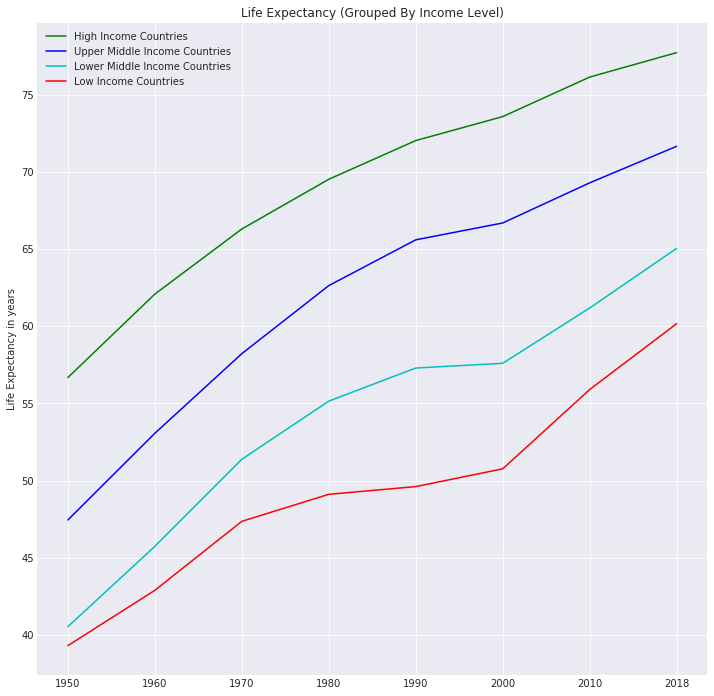

In [97]:
A = low_income_expectancy.mean()
B = lower_middle_income_expectancy.mean()
C = upper_middle_income_expectancy.mean()
D = high_income_expectancy.mean()

plt.plot(D, 'g-', label='High Income Countries')
plt.plot(C, 'b-', label='Upper Middle Income Countries')
plt.plot(B, 'c-', label='Lower Middle Income Countries')
plt.plot(A, 'r-', label='Low Income Countries')


from pylab import rcParams
rcParams['figure.figsize'] = 12,12
plt.legend(loc='upper left')
plt.ylabel('Life Expectancy in years')
plt.title('Life Expectancy (Grouped By Income Level)')

so this graph clearly shows that richer the country, longer the life expectancy. since the 1950, we can see that red line (low income countries) are also the countries with the shorted life expectancy. and the life expectancy is directly linked to the income level. richer the country, longer is the life expectancy. But thats not really a suprise. 
<p> now let's compare each income group by fertility Rate.

### comparaison on Fertility Rate (Number of Babies per woman): How do country from different Income Level differs when its come to the number of babies per woman? 

Earlier we created 4 Dataframes for the fertility rate
* low_income_birth
* lower_middle_income_birth
* upper_middle_income_birth
* high_income_birth

##### Babies per Woman In Countries with Low Income  (Countries with GNI per Capita between < 995)

In [66]:
#checking the dataframe
low_income_birth.head(1)

,country,1950,1960,1970,1980,1990,2000,2010,2018
26,Burundi,6.82,6.95,7.29,7.42,7.51,7.01,6.26,5.53


In [67]:
#checking for null Values
low_income_birth.isnull().sum().sum()

0

In [68]:
low_income_birth.describe()

,1950,1960,1970,1980,1990,2000,2010,2018
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,6.458333,6.650000,6.816667,6.963333,7.020000,6.775000,6.221667,5.638333
std,0.704086,0.667263,0.641301,0.655062,0.733975,0.899906,0.952836,0.976390
min,5.400000,5.840000,5.950000,5.950000,5.810000,5.500000,5.020000,4.450000
25%,6.055000,6.102500,6.332500,6.685000,6.657500,6.150000,5.480000,4.922500
50%,6.535000,6.680000,6.940000,6.990000,7.265000,6.985000,6.365000,5.725000
75%,6.985000,7.175000,7.262500,7.317500,7.482500,7.467500,6.770000,6.040000
max,7.250000,7.450000,7.570000,7.840000,7.770000,7.680000,7.490000,7.130000


For this group, the change is relatively small. in 1950 the average number of children per child was 6.45. in 2018 it is 6.45. with a pick in 1990. 

##### Babies per Woman In Countries with Lower Middle Income  (Countries with GNI per Capita between 996 and 3895 USD)

In [69]:
lower_middle_income_birth.head(1)

,country,1950,1960,1970,1980,1990,2000,2010,2018
0,Afghanistan,7.57,7.45,7.45,7.45,7.47,7.49,5.82,4.33


In [70]:
# checking null values, there is none
lower_middle_income_birth.isnull().sum().sum()

0

In [71]:
lower_middle_income_birth.describe()

,1950,1960,1970,1980,1990,2000,2010,2018
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,6.406522,6.666957,6.742609,6.567826,6.026957,5.281957,4.575000,4.016522
std,0.987257,0.681038,0.773366,1.019141,1.082499,1.214224,1.129454,0.989047
min,1.950000,4.580000,4.320000,2.770000,2.290000,1.990000,1.980000,1.890000
25%,5.992500,6.280000,6.240000,6.250000,5.317500,4.317500,3.592500,3.342500
50%,6.555000,6.785000,6.820000,6.685000,6.195000,5.460000,4.830000,4.140000
75%,6.942500,7.000000,7.235000,7.130000,6.720000,6.070000,5.355000,4.700000
max,7.920000,8.190000,8.230000,8.750000,8.610000,7.490000,6.590000,5.880000


##### Babies per Woman In Countries with Upper Middle Income  (Countries with GNI per Capita between 3895 and 12055 USD)

In [72]:
upper_middle_income_birth.head(1)

,country,1950,1960,1970,1980,1990,2000,2010,2018
3,Angola,7.11,7.48,7.6,7.5,7.25,6.64,6.16,5.55


In [73]:
# checking null values, there is none
upper_middle_income_birth.isnull().sum().sum()

0

##### Babies per Woman In Countries with High Income countries  (Countries with GNI per Capita > 12055 USD)

In [74]:
high_income_birth.head(1)

,country,1950,1960,1970,1980,1990,2000,2010,2018
1,Albania,5.87,6.49,4.91,3.62,2.98,2.16,1.65,1.71


In [75]:
# checking null values, there is none
high_income_birth.isnull().sum().sum()

0

In [76]:
high_income_birth.describe()

,1950,1960,1970,1980,1990,2000,2010,2018
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,4.587391,4.550326,4.040652,3.285652,2.730978,2.115435,1.995000,1.918913
std,1.771416,1.843716,1.847032,1.677433,1.265315,0.840647,0.669322,0.557554
min,1.870000,1.910000,1.830000,1.460000,1.300000,1.120000,1.190000,1.240000
25%,2.935000,2.707500,2.370000,2.022500,1.807500,1.500000,1.517500,1.570000
50%,4.490000,4.155000,3.540000,2.515000,2.250000,1.935000,1.870000,1.770000
75%,6.157500,6.450000,5.627500,4.212500,3.240000,2.565000,2.222500,2.032500
max,8.110000,7.560000,8.130000,8.300000,7.170000,5.830000,5.210000,4.510000


By quicly having a look at the table above, we can se a much shaper decrease in  number of birth. from 4.5 in 1950 to 1.9 in  2013. with a shaper decrease from the 1980's.

<p> let's plot all 4 groups to see how the differences and similiraties

Text(0.5,1,'Number of Babies Per Woman (Countries of all Income Level)')

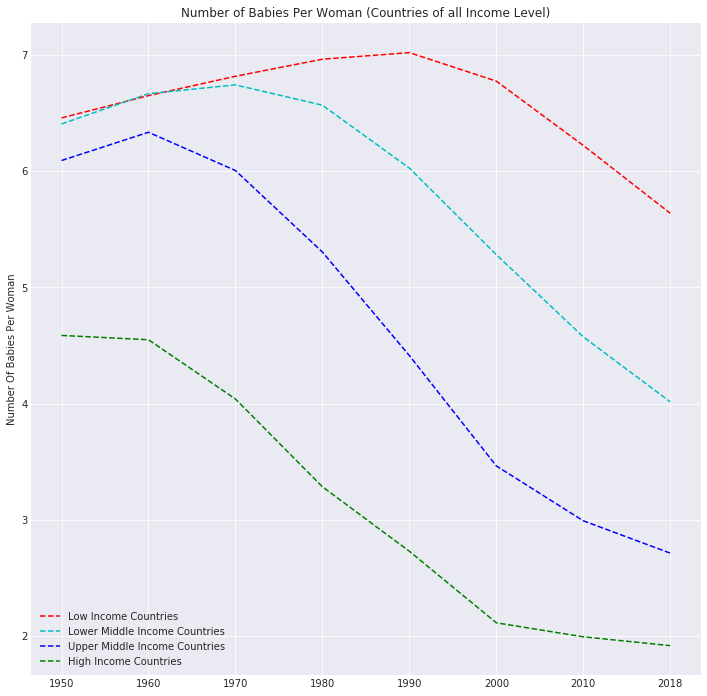

In [95]:
A = low_income_birth.mean()
B = lower_middle_income_birth.mean()
C = upper_middle_income_birth.mean()
D = high_income_birth.mean()
plt.plot(A, 'r--', label='Low Income Countries')
plt.plot(B, 'c--', label='Lower Middle Income Countries')
plt.plot(C, 'b--', label='Upper Middle Income Countries')
plt.plot(D, 'g--', label='High Income Countries')
from pylab import rcParams
rcParams['figure.figsize'] = 12,12
plt.legend(loc='lower left')
plt.ylabel('Number Of Babies Per Woman')
plt.title('Number of Babies Per Woman (Countries of all Income Level)')

We can clearly see that since the 1950's there has been a decrease in the number of birth in all countries. up to late 1960's the low income and lower income countries had same numbers of birth. but as time went by, birth in  lower middle income countries become lower than countries from the Low Income Group. 
<p> so richer countries have longer lives and fewer children. there has been negative correlation between Life expectancy and number of births, at least from the 1950's. 
 <P> does that impact the economic growth? growth is based upon so many metrics but todays we will just focus on life expectancy and number of birth

### comparaison on Growth : So richer countries  all have long life expectacncy and fewer babies. How is their growth going going? is there any  hope for the future for people from Low Income Countries 
* low_income_growth
* lower_middle_income_growth
* upper_middle_income_growth
* high_income_growth

So we can see that richer countries consistently have higher Life Expectancy and Fewer children. But isn't that at some point affecting growth? In some of the richest countries, like Japan, retreat age is being pushed and foreigners are welcome to fill in jobs because nationals are no longer enough. Growth Is dependent on so many things. but is there a relationship between growth and Fertility Rate and the life Expectancy of a country? 
let's find out in this section
<p> as previously done, we are going to use the data that we grouped. visualize and then draw conclusions

In [78]:
#checking the dataframe
low_income_growth.head(1)

,country,1950,1960,1970,1980,1990,2000,2010,2013
27,Burundi,0.855,1.47,26.3,6.4,3.63,-1.15,3.98,3.91


In [79]:
#checking for null values
low_income_growth.isnull().sum().sum()

0

In [80]:
lower_middle_income_growth.head(1)

,country,1950,1960,1970,1980,1990,2000,2010,2013
0,Afghanistan,1.42,3.37,1.94,-0.28,-0.885,1.74,8.04,4.47


In [81]:
#Checking where null values are
lower_middle_income_growth.isnull().sum()

country    0
1950       0
1960       0
1970       0
1980       0
1990       0
2000       0
2010       1
2013       4
dtype: int64

In [82]:
# replacing missing values in 2010 and 2013 with the group mean Growth of the year
lower_middle_income_growth['2010'].fillna((lower_middle_income_growth['2010'].mean()), inplace=True)
lower_middle_income_growth['2013'].fillna((lower_middle_income_growth['2013'].mean()), inplace=True)
lower_middle_income_growth.isnull().sum().sum()


/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


0

In [83]:
high_income_growth.isnull().sum()

country    0
1950       0
1960       0
1970       0
1980       0
1990       0
2000       0
2010       0
2013       5
dtype: int64

In [84]:
#looking for mean growth value for each decade for all the 4 groups
low_income_growth.mean()

1950    2.117500
1960    3.902333
1970    8.180500
1980    1.417667
1990   -9.010000
2000    2.975167
2010    5.713333
2013   -1.505000
dtype: float64

In [85]:
high_income_growth['2013'].fillna((high_income_growth['2013'].mean()), inplace=True)
high_income_growth.isnull().sum().sum()

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


0

In Order to make a bar chart with the growth from all 4 groups. I simply used looked for the mean value for each decades(as done above). There must be different ways to do this, but since in this case we only have a small number of values, I simply copied/paste them from the cell above to the cell below. 

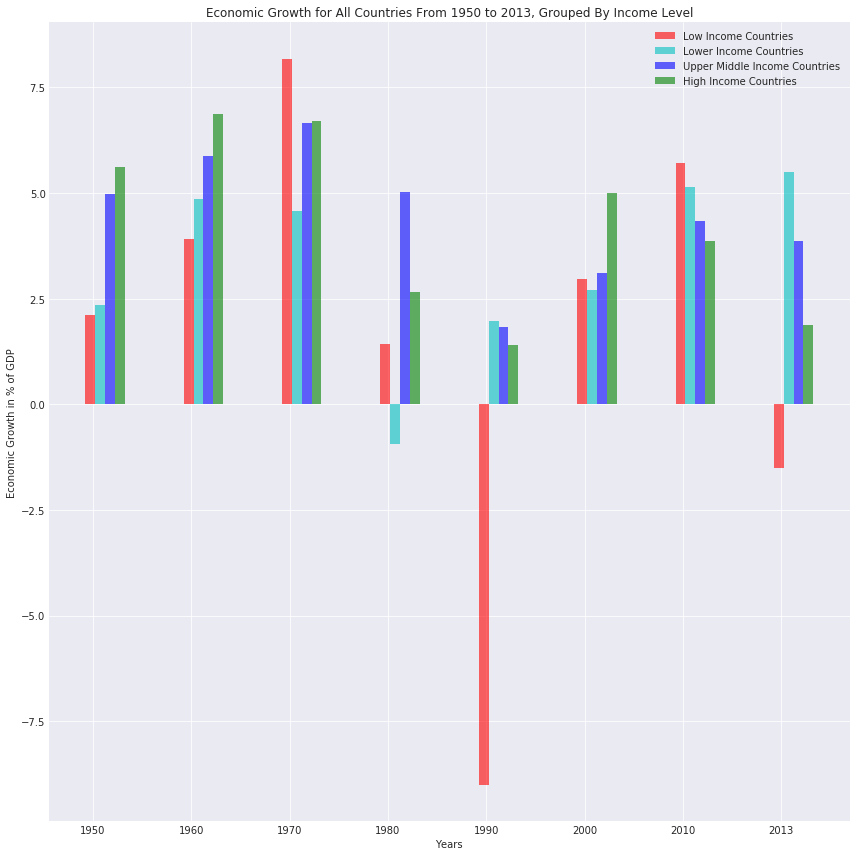

In [98]:
# data to plot

n_groups = 8

low_mean_growth = (2.117500,3.902333,8.180500,1.417667, -9.010000,2.975167, 5.713333,-1.505000)
lower_mean_growth = (2.354979,4.863750 , 4.566604, -0.938271,1.970963,2.698229,5.142915, 5.499795 )
upper_mean_growth = (4.969780,5.869163,6.669439,5.017659, 1.820954,3.109122,4.343732, 3.857488 )
high_mean_growth = (5.617388,6.867168,6.713541,2.651132,1.405147,5.011735, 3.866864, 1.881906)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.6

rects1 = plt.bar(index, low_mean_growth, bar_width, 
                 alpha=opacity, color='r',label='Low Income Countries')
rects2 = plt.bar(index + bar_width,lower_mean_growth, bar_width, 
                 alpha=opacity, color='c', label='Lower Income Countries')
rects3 = plt.bar(index + bar_width + bar_width,upper_mean_growth, bar_width, 
                 alpha=opacity,  color='b', label='Upper Middle Income Countries')
rects4 = plt.bar(index + bar_width + bar_width + bar_width,high_mean_growth, bar_width, 
                 alpha=opacity, color='g', label='High Income Countries')
rcParams['figure.figsize'] = 12,12

ax.set_xlabel('Years')
ax.set_ylabel('Economic Growth in % of GDP')
ax.set_title('Economic Growth for All Countries From 1950 to 2013, Grouped By Income Level')
ax.set_xticks(index + bar_width / 4)
ax.set_xticklabels(('1950', '1960', '1970', '1980', '1990', '2000',
                           '2010', '2013'))

ax.legend()
fig.tight_layout()
plt.show()

In [87]:
# checking growth in the low income group
#looking at the 1990 column in the low income group to understand 
low_income_growth

,country,1950,1960,1970,1980,1990,2000,2010,2013
27,Burundi,0.855,1.470,26.300,6.400,3.63,-1.150,3.98,3.91
32,Central African Republic,5.200,0.674,4.210,-0.894,3.09,1.720,2.46,-36.00
38,"Congo, Dem. Rep.",1.990,9.540,-0.187,2.410,-6.58,-6.900,7.19,8.11
94,Liberia,2.200,2.900,6.410,-6.290,-51.00,22.400,7.26,7.81
124,Niger,1.190,7.310,3.890,5.220,-1.47,-0.779,11.20,4.03
155,Somalia,1.270,1.520,8.460,1.660,-1.73,2.560,2.19,3.11


so from the chart above shows growth for each group in the years 1950, 1960, 1970, 1980, 1990, 2000, 2010 and 2013. we can see that the low income group had a huge growth in 1970. and one really visible negative value in 1990. the data looked so strange that I had to look at the data once again. (check the table above)<br>
and one big outlier was Liberia with -51.00 in the year 1990. By making a quick google search, I could notice that year the country knew a civil war. my first attempt was to remove this extreme value but since 4 out of 6 countries in that group had negative values that year, I decided to leave the plot as is. https://en.wikipedia.org/wiki/First_Liberian_Civil_War. 
<p> apart from negative growth in 1980 for lower middle income countries and another negative value in 2013 for the low income countries in 2013, all groups seemed to have enjoyed growth at different levels. 
Since I could not really observe any tendencies, I decided to also plot a line graph with the same data. as shown below


Text(0.5,1,'Economic Growth for All Countries From 1950 to 2013, Grouped By Income Level')

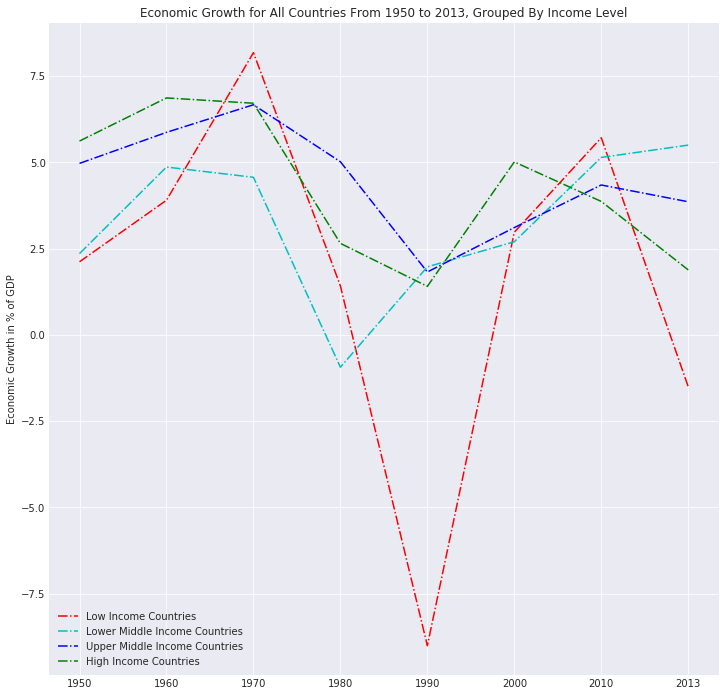

In [99]:
A = low_income_growth.mean()
B = lower_middle_income_growth.mean()
C = upper_middle_income_growth.mean()
D = high_income_growth.mean()
plt.plot(A, 'r-.', label='Low Income Countries')
plt.plot(B, 'c-.', label='Lower Middle Income Countries')
plt.plot(C, 'b-.', label='Upper Middle Income Countries')
plt.plot(D, 'g-.', label='High Income Countries')
from pylab import rcParams
rcParams['figure.figsize'] = 8,8
plt.legend(loc='lower left')
plt.ylabel('Economic Growth in % of GDP')
plt.title('Economic Growth for All Countries From 1950 to 2013, Grouped By Income Level')

This graphs shows better the more erratic tendencies in growth. the green and blue line which the 2 richest group did not fall below 0 of growth but have benefited for less spectacular number in general. In 2013, which is how far the data is available, we can see that lower middle income are benefiting from the highest growth. <br>
But at the opposite of the previous metrics, not patterns can be observed. 

<a id='conclusions'></a>
## Conclusions


>* we are at the end of this analysis. we could see that people in richer country enjoyed a longer life in average compared to people with a smaller GDP. <br> And that people in less wealthy countries had more children in average comparing to people in richer countries. 
* Life expectancy and fertility rate are negatively correlated. even if this analysis could not show any causation. so this is a mere observation.
* This analysis could only show that economic growth knows more pronounced changes than the other variables. but based on this analysis alone, it is hard to draw any conclusions on any relationships between longevity, fertiliy and economic growth as a trio. 
* GDP VS GNI : As previously explained the data used to group the country is the GDP of each country. but instead of using Quartiles,I used the world bank measurement which to be a more realistics measures. But Again, it is not a perfect measure so please take this classification with a grain of salt. the GNI is the measure used in 2018 by the world bank to classify countries by Income.
* 2018 vs 2013 : the data in the life expectancy, number of babies per woman and countries's GDP were all up to 2018. the Growth Dataset only had data up to 2013. But again the grouping was made based on each countries 2018's GDP. <br> since the goal was to look how the different metrics have evolved in the last decades. 

Personally this analysis left me a little sad. My secret hope had been that all  countries or almost all countries had been benefiting from a steady growth since the 1950' and 1960's.<br> 
So I went to look one more time at the proportion of each group. and it made me feel a little better. 
<p> As shown  on the pie chart below, more than 70% of countries are either in High income group (50.8%) or in the upper middle Income countries (21.2%)
<br> And only 3.1% of the countries are in the Low income Group. <br>
Again please take this classification with a grain of salt. 
The chart with proportions is below

### Proportions of Each Income Level Group

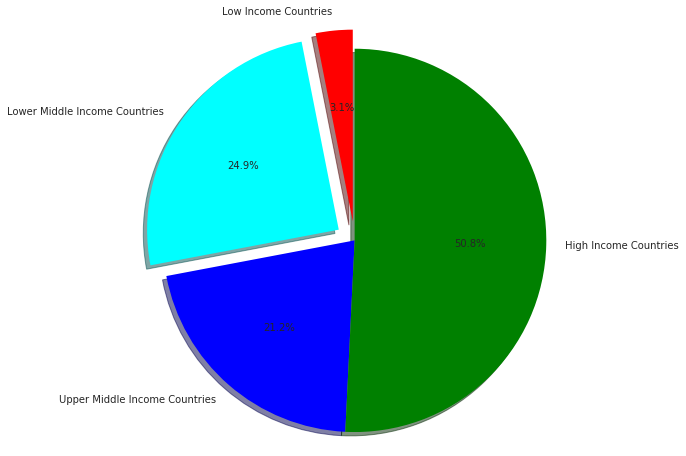

In [89]:
labels = 'Low Income Countries', 'Lower Middle Income Countries', 'Upper Middle Income Countries', 'High Income Countries'
sizes = [low_income.country.count(),lower_middle_income.country.count() ,
         upper_middle_income.country.count(),high_income.country.count() ]
colors = ('red', 'cyan', 'b', 'g')
explode = (0.1, 0.1, 0, 0)  # only "explode" 1st & 2nd slice 

fig1, ax1 = plt.subplots()

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
rcParams['figure.figsize'] = 5,5
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

This is the end, Thank you.

In [90]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0